In [55]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import optim
import torch.nn as nn


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [56]:
# Load datas
train_data = datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

In [57]:
images=[]
labels=[]
flatten_images=[]
for img, label in train_data:
    images.append(img.squeeze().numpy())
    flatten_images.append(img.numpy().flatten())
    labels.append(label)

In [58]:
from sklearn import decomposition

pca=decomposition.PCA(n_components=2)
flatten_image_transform = pca.fit_transform(flatten_images)
flatten_image_transform.shape


(60000, 2)

In [59]:
flatten_image_transform[1]

array([ 3.96754176, -1.15622854])

In [60]:
labels[1]

0

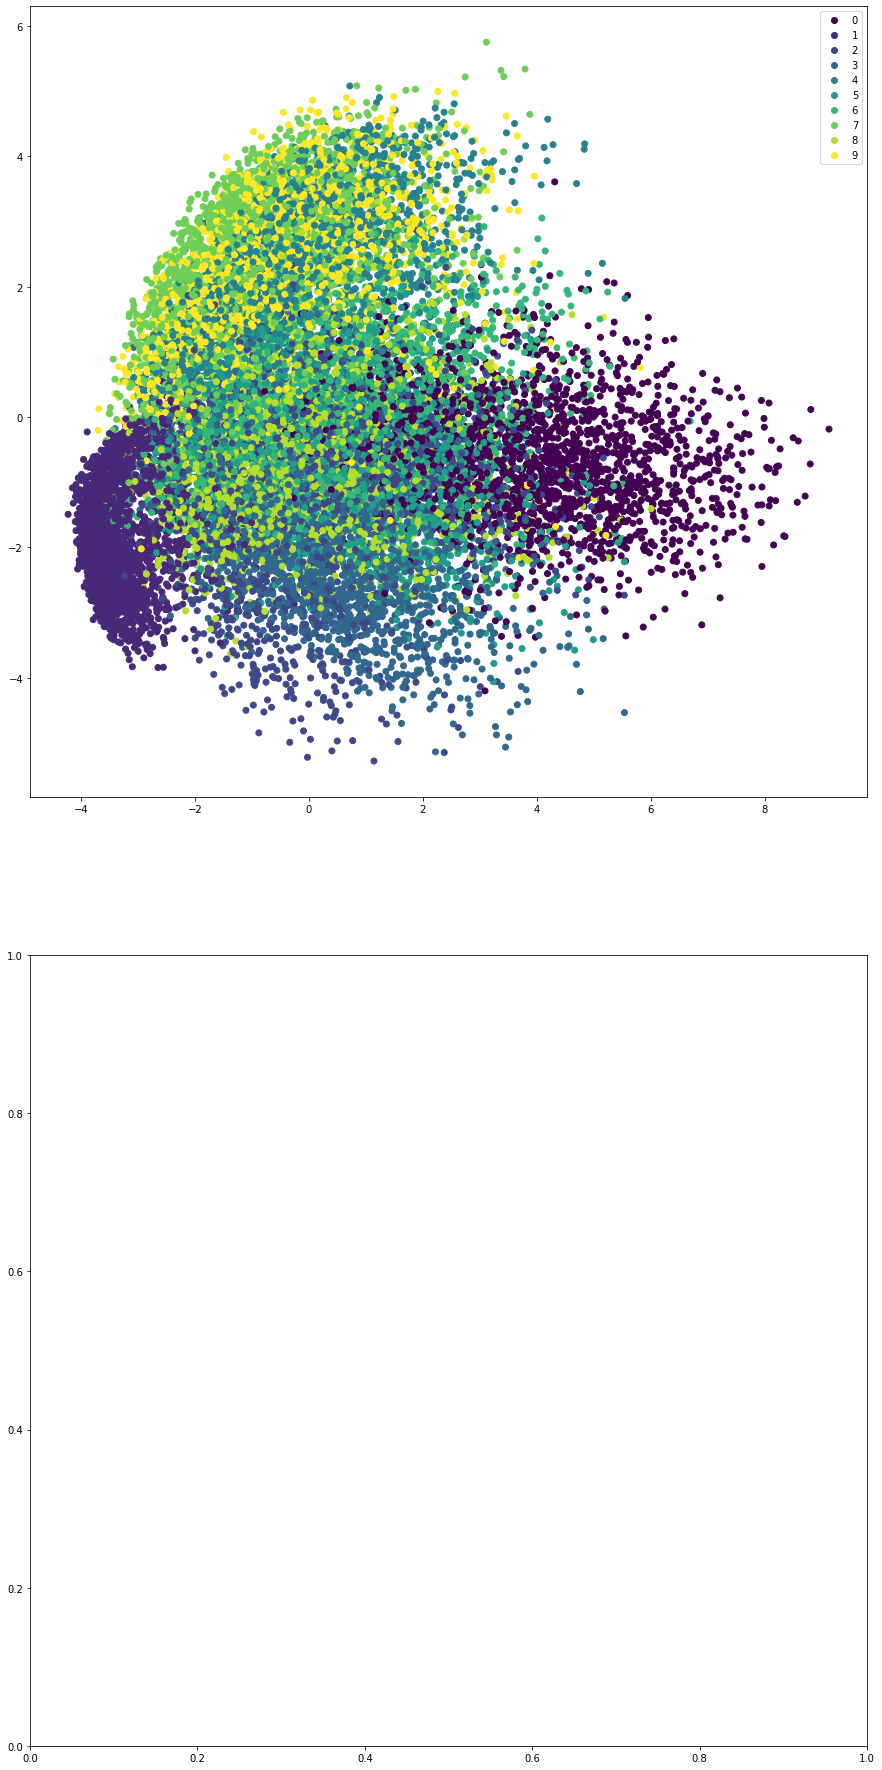

In [61]:
fig,axs=plt.subplots(2,1)
fig.set_size_inches(15,32)
scatter=axs[0].scatter(flatten_image_transform[:20000,0],flatten_image_transform[:20000,1], c=labels[:20000])
axs[0].legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4,5,6,7,8,9])

In [62]:
loader = torch.utils.data.DataLoader(
    dataset = train_data,
    batch_size=32,
    shuffle=True
)

In [99]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()
		
		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 9),
		)
		
		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(9, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 28 * 28),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded
	
	def latent_space(self,x):
		return self.encoder(x)


In [101]:
# Model Initialization
model = AE()
  
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
  
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
)


In [102]:
epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:
        
      # Reshaping the image to (-1, 784)
      image = image.reshape(-1, 28*28)
        
      # Output of Autoencoder
      reconstructed = model(image)
        
      # Calculating the loss function
      loss = loss_function(reconstructed, image)
        
      # The gradients are set to zero,
      # the the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      # Storing the losses in a list for plotting
      losses.append(loss)
    outputs.append((epochs, image, reconstructed))
    print(epoch)
# # Defining the Plot Style
# plt.style.use('fivethirtyeight')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
  
# # Plotting the last 100 values
# plt.plot(losses[-100:])

0
1
2
3
4
5
6
7
8
9


In [ ]:
#Confused on how to get the latent_space for plotting after training.